In [1]:
import pandas as pd
from sklearn import metrics
import lightgbm as lgb
import numpy as np

In [3]:
df = pd.read_csv("../data/Test_transformed.csv")

In [4]:
df = df.drop(columns="Unnamed: 0")

In [5]:
X_test = df.drop(columns = ['Description'])
Y_test = df['Description']

In [6]:
X_test.columns

Index(['Outside', 'Weapon_FIREARM', 'Weapon_HANDS', 'Weapon_KNIFE',
       'Weapon_NONE', 'Weapon_OTHER', 'Neighborhood', 'Premise', 'Month',
       'Hour'],
      dtype='object')

In [7]:
X_test.head()

,Outside,Weapon_FIREARM,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Neighborhood,Premise,Month,Hour
0,1,0,0,0,1,0,118,103,12,0
1,1,0,0,0,1,0,136,103,12,0
2,1,0,0,0,1,0,82,103,12,0
3,1,0,0,0,1,0,71,103,12,0
4,1,0,0,0,1,0,227,103,12,0


In [8]:
MODEL = lgb.Booster(model_file='YOLO_SWAG.txt')

In [9]:
prediction_probs = MODEL.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

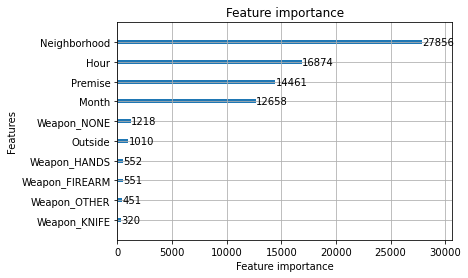

In [10]:
lgb.plot_importance(MODEL)

In [11]:
predictions = []

In [12]:
for i in range(len(prediction_probs)):
    predictions.append(np.where(prediction_probs[i]==np.max(prediction_probs[i]))[0][0])
    

In [13]:
metrics.accuracy_score(predictions,Y_test)

0.404021294381627

In [14]:
metrics.recall_score(predictions,Y_test,average="weighted",zero_division=0)

0.404021294381627

In [15]:
metrics.precision_score(predictions,Y_test,average="weighted",zero_division=0)

0.5125862534031598

In [16]:
metrics.f1_score(predictions,Y_test,average="weighted",zero_division=0)

0.4394776208370662

### Use the decoder csv files to convert numerical values to strings

In [17]:
print(predictions)

[8, 8, 7, 3, 3, 3, 7, 3, 3, 3, 7, 8, 4, 3, 0, 8, 3, 7, 7, 8, 3, 3, 13, 7, 3, 13, 3, 8, 3, 3, 7, 8, 7, 3, 3, 4, 3, 3, 7, 3, 3, 3, 0, 7, 0, 8, 3, 8, 3, 3, 3, 4, 8, 7, 3, 8, 8, 8, 8, 3, 8, 3, 8, 3, 7, 3, 8, 8, 3, 3, 3, 8, 0, 8, 3, 8, 9, 3, 8, 8, 3, 3, 3, 3, 3, 13, 3, 13, 13, 3, 3, 3, 8, 3, 3, 3, 13, 3, 3, 3, 8, 3, 4, 13, 7, 8, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 8, 13, 13, 8, 3, 13, 3, 3, 13, 8, 8, 3, 3, 8, 4, 3, 3, 3, 4, 8, 3, 4, 4, 13, 3, 8, 4, 3, 3, 3, 3, 3, 8, 3, 8, 3, 3, 3, 3, 3, 3, 0, 8, 3, 7, 3, 3, 3, 3, 3, 3, 3, 7, 3, 7, 3, 3, 8, 13, 13, 13, 3, 7, 3, 3, 7, 3, 8, 8, 4, 3, 0, 0, 3, 3, 0, 7, 8, 3, 4, 8, 7, 3, 8, 3, 3, 8, 3, 3, 3, 8, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 7, 3, 7, 8, 8, 8, 3, 3, 4, 4, 3, 3, 8, 4, 13, 4, 3, 8, 3, 7, 3, 7, 5, 0, 7, 3, 3, 8, 3, 3, 3, 3, 7, 13, 8, 4, 3, 3, 13, 7, 7, 8, 8, 4, 3, 8, 4, 7, 8, 7, 3, 3, 7, 3, 5, 3, 4, 7, 8, 3, 13, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 8, 8, 4, 8, 8, 4, 7, 8, 8, 3, 3, 8, 3, 3, 3, 11, 11, 11, 11, 7, 0, 8, 8, 7, 3, 3, 3, 3, 3, 3, 7, 8, 13, 3, 3, 7, 